<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# 1. Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Cost function for logistic regression
def cost_function(y, y_pred):
    m = len(y)
    return (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# 3. Gradient descent algorithm
def gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(num_iterations):
        y_pred = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost_history.append(cost_function(y, y_pred))

    return theta, cost_history

In [3]:
# Sample data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)

# Add intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# 4. Train the model
alpha = 0.01
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, alpha, num_iterations)

# Predict
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) > 0.5).astype(int)

y_pred = predict(X, theta)

accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.00%


##  Visualization

In [4]:
import matplotlib.pyplot as plt

##  Visualize the training data

Text(0, 0.5, '$x_2$')

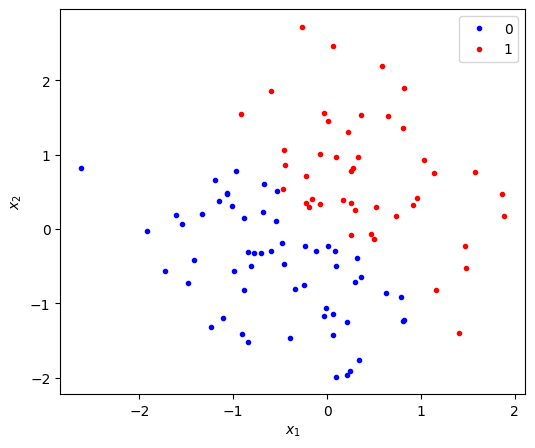

In [23]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(X[y.flatten()==0,1], X[y.flatten()==0,2],'.b', label='0')
ax.plot(X[y.flatten()==1,1], X[y.flatten()==1,2],'.r', label='1')
ax.legend()
#ax.grid()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Visualize learning curve

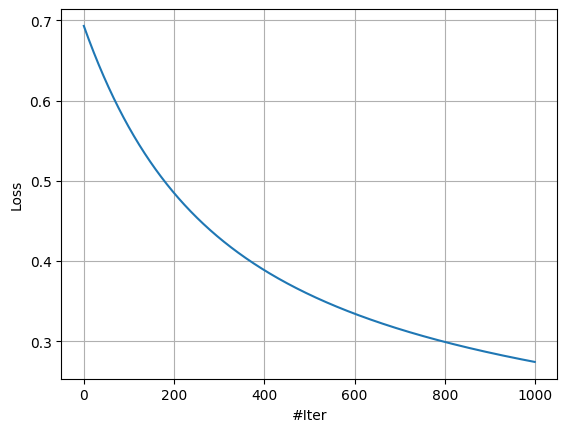

In [25]:
plt.plot(cost_history)
plt.xlabel("#Iter")
plt.ylabel('Loss')
plt.grid()

### plot decision boundary

Text(0, 0.5, '$x_2$')

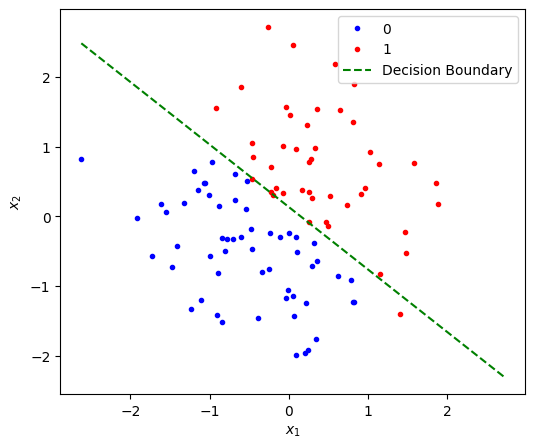

In [36]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(X[y.flatten()==0,1], X[y.flatten()==0,2],'.b', label='0')
ax.plot(X[y.flatten()==1,1], X[y.flatten()==1,2],'.r', label='1')


test_x = np.array([np.min(X[:,1]), np.max(X[:,2])])
ax.plot(test_x, -(theta[0]+theta[1]*test_x)/theta[2],'--g', label='Decision Boundary')

ax.legend()
#ax.grid()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

In [30]:
max_x

2.720169166589619